# BTCUSDT Data Exploration & MAR Indicator Visualization

This notebook explores the BTCUSDT data with calculated MAR (Moving Average Ribbon) features and provides visualizations for understanding price patterns and indicator behavior.

## 1. Setup

Import required libraries and set up paths.

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Paths
BASE_DIR = Path(r'C:\Users\jakers\Desktop\bot')
FEATURES_DIR = BASE_DIR / 'features'

# Default timeframe
TIMEFRAME = '1h'

print(f"Base directory: {BASE_DIR}")
print(f"Features directory: {FEATURES_DIR}")
print(f"Default timeframe: {TIMEFRAME}")

Base directory: C:\Users\jakers\Desktop\bot
Features directory: C:\Users\jakers\Desktop\bot\features
Default timeframe: 1h


## 2. Load Data

Load the features from parquet files.

In [2]:
# Load data
feature_file = FEATURES_DIR / f'BTCUSDT_{TIMEFRAME}_features.parquet'
print(f"Loading data from: {feature_file}")

df = pd.read_parquet(feature_file)

# Convert open_time to datetime if it's not already
if 'open_time' in df.columns:
    df['open_time'] = pd.to_datetime(df['open_time'])
    df = df.sort_values('open_time').reset_index(drop=True)

print(f"\nData loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Loading data from: C:\Users\jakers\Desktop\bot\features\BTCUSDT_1h_features.parquet

Data loaded successfully!
Shape: (51864, 232)

First few rows:


open_time        open        high         low       close  \
0 2020-01-01 00:00:00 7189.430000 7190.520000 7170.150000 7171.550000   
1 2020-01-01 01:00:00 7171.430000 7225.000000 7171.100000 7210.240000   
2 2020-01-01 02:00:00 7210.380000 7239.300000 7206.460000 7237.990000   
3 2020-01-01 03:00:00 7237.410000 7239.740000 7215.000000 7221.650000   
4 2020-01-01 04:00:00 7221.800000 7225.410000 7211.220000 7213.860000   

       volume              close_time    quote_volume  trades  taker_buy_base  \
0 2449.049000 2020-01-01 00:59:59.999 17576424.439700    3688      996.198000   
1 3865.038000 2020-01-01 01:59:59.999 27838046.006700    6635     2340.878000   
2 3228.365000 2020-01-01 02:59:59.999 23324810.407210    5120     1774.145000   
3 2513.307000 2020-01-01 03:59:59.999 18161821.858740    4143     1245.065000   
4 1176.666000 2020-01-01 04:59:59.999  8493630.867810    1966      586.864000   

   taker_buy_quote  ignore     ma5_sma  ma6_sma  ma7_sma  ma8_sma  ma9_sma  \
0   7149370.763530       0         NaN      NaN      NaN      NaN      NaN   
1  16860294.053460       0         NaN      NaN      NaN      NaN      NaN   
2  12818470.641190       0         NaN      NaN      NaN      NaN      NaN   
3   8996218.688430       0         NaN      NaN      NaN      NaN      NaN   
4   4236084.260510       0 7211.058000      NaN      NaN      NaN      NaN   

   ma10_sma  ma11_sma  ma12_sma  ma13_sma  ma14_sma  ma15_sma  ma16_sma  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   ma17_sma  ma18_sma  ma19_sma  ma20_sma  ma21_sma  ma22_sma  ma23_sma  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   ma24_sma  ma25_sma  ma26_sma  ma27_sma  ma28_sma  ma29_sma  ma30_sma  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   ma31_sma  ma32_sma  ma33_sma  ma34_sma  ma35_sma  ma36_sma     ma5_ema  \
0       NaN       NaN       NaN       NaN       NaN       NaN 7171.550000   
1       NaN       NaN       NaN       NaN       NaN       NaN 7184.446667   
2       NaN       NaN       NaN       NaN       NaN       NaN 7202.294444   
3       NaN       NaN       NaN       NaN       NaN       NaN 7208.746296   
4       NaN       NaN       NaN       NaN       NaN       NaN 7210.450864   

      ma6_ema     ma7_ema     ma8_ema     ma9_ema    ma10_ema    ma11_ema  \
0 7171.550000 7171.550000 7171.550000 7171.550000 7171.550000 7171.550000   
1 7182.604286 7181.222500 7180.147778 7179.288000 7178.584545 7177.998333   
2 7198.428776 7195.414375 7193.001605 7191.028400 7189.385537 7187.996944   
3 7205.063411 7201.973281 7199.367915 7197.152720 7195.251803 7193.605787   
4 7207.576722 7204.944961 7202.588378 7200.494176 7198.635112 7196.981489   

     ma12_ema    ma13_ema    ma14_ema    ma15_ema    ma16_ema    ma17_ema  \
0 7171.550000 7171.550000 7171.550000 7171.550000 7171.550000 7171.550000   
1 7177.502308 7177.077143 7176.708667 7176.386250 7176.101765 7175.848889   
2 7186.808107 7185.778980 7184.879511 7184.086719 7183.382734 7182.753457   
3 7192.168398 7190.903411 7189

## 3. Data Overview

Examine the dataset structure, date range, and basic statistics.

In [3]:
print("="*80)
print("DATA OVERVIEW")
print("="*80)

print(f"\nShape: {df.shape[0]:,} rows x {df.shape[1]} columns")

if 'open_time' in df.columns:
    print(f"\nDate Range:")
    print(f"  Start: {df['open_time'].min()}")
    print(f"  End:   {df['open_time'].max()}")
    print(f"  Duration: {df['open_time'].max() - df['open_time'].min()}")

print(f"\nColumns ({len(df.columns)}):")
print(df.columns.tolist())

DATA OVERVIEW

Shape: 51,864 rows x 232 columns

Date Range:
  Start: 2020-01-01 00:00:00
  End:   2025-11-30 23:00:00
  Duration: 2160 days 23:00:00

Columns (232):
['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume', 'trades', 'taker_buy_base', 'taker_buy_quote', 'ignore', 'ma5_sma', 'ma6_sma', 'ma7_sma', 'ma8_sma', 'ma9_sma', 'ma10_sma', 'ma11_sma', 'ma12_sma', 'ma13_sma', 'ma14_sma', 'ma15_sma', 'ma16_sma', 'ma17_sma', 'ma18_sma', 'ma19_sma', 'ma20_sma', 'ma21_sma', 'ma22_sma', 'ma23_sma', 'ma24_sma', 'ma25_sma', 'ma26_sma', 'ma27_sma', 'ma28_sma', 'ma29_sma', 'ma30_sma', 'ma31_sma', 'ma32_sma', 'ma33_sma', 'ma34_sma', 'ma35_sma', 'ma36_sma', 'ma5_ema', 'ma6_ema', 'ma7_ema', 'ma8_ema', 'ma9_ema', 'ma10_ema', 'ma11_ema', 'ma12_ema', 'ma13_ema', 'ma14_ema', 'ma15_ema', 'ma16_ema', 'ma17_ema', 'ma18_ema', 'ma19_ema', 'ma20_ema', 'ma21_ema', 'ma22_ema', 'ma23_ema', 'ma24_ema', 'ma25_ema', 'ma26_ema', 'ma27_ema', 'ma28_ema', 'ma29_ema', 'ma30_ema', 'ma31

In [4]:
# Basic statistics for price data
print("\nPrice Statistics:")
price_cols = ['open', 'high', 'low', 'close', 'volume']
df[price_cols].describe()


Price Statistics:


open          high           low         close        volume
count  51864.000000  51864.000000  51864.000000  51864.000000  51864.000000
mean   46549.895547  46739.180717  46353.414868  46551.495560  14129.134317
std    31223.171053  31314.969325  31128.521669  31223.281843  15951.463339
min     4062.950000   4598.000000   3621.810000   4062.890000      0.000000
25%    21626.100000  21722.600000  21534.400000  21627.800000   5297.324000
50%    39136.600000  39399.500000  38900.000000  39137.600000   9229.624500
75%    63631.900000  63860.250000  63361.125000  63632.675000  16942.589000
max   125986.100000 126208.500000 125185.100000 125986.000000 355275.447000

In [5]:
# Check for missing values
print("\nMissing Values:")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if len(missing) > 0:
    print(missing)
else:
    print("No missing values found!")


Missing Values:
slope_ma36_sma    40
slope_ma36_wma    40
slope_ma35_wma    39
slope_ma35_sma    39
slope_ma34_sma    38
                  ..
ma5_sma            4
ma5_wma            4
ma_range_wma       4
ma_range_pct       4
ma_range_sma       4
Length: 171, dtype: int64


In [6]:
# MAR indicator features
print("\nMAR Indicator Features:")
mar_cols = ['spread_pct', 'ma_range_pct', 'compression', 'expansion', 'price_position']
mar_cols_available = [col for col in mar_cols if col in df.columns]
df[mar_cols_available].describe()


MAR Indicator Features:


spread_pct  ma_range_pct  compression    expansion  price_position
count 51829.000000  51860.000000 51864.000000 51864.000000    51864.000000
mean      1.288294      1.503627     0.211669     0.354735        0.523600
std       1.514346      1.515223     0.408495     0.478438        0.419988
min       0.000038      0.000000     0.000000     0.000000        0.000000
25%       0.325171      0.565343     0.000000     0.000000        0.031250
50%       0.830978      1.072536     0.000000     0.000000        0.562500
75%       1.733372      1.946403     0.000000     1.000000        1.000000
max      44.699430     44.699430     1.000000     1.000000        1.000000

## 4. Candlestick Chart with MA Ribbon

Interactive candlestick chart with 32 SMAs overlaid. MAs are colored:
- Green: MA is below close (support)
- Red: MA is above close (resistance)

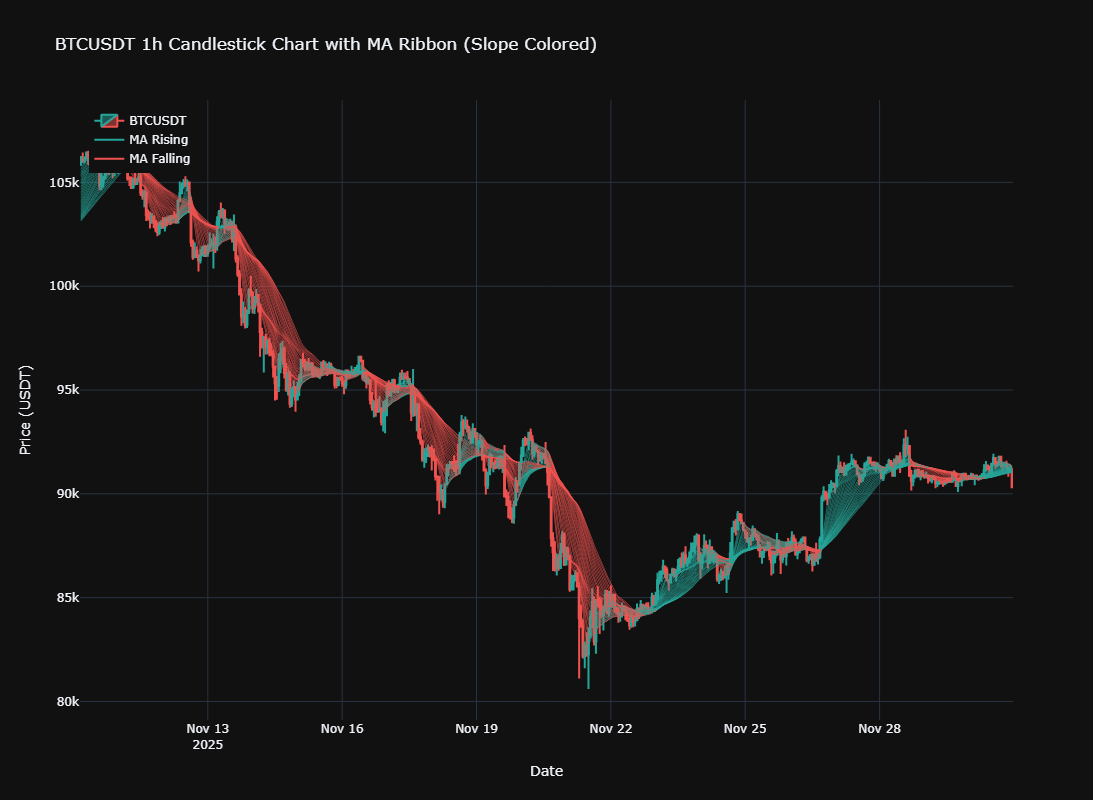


Displaying last 500 candles
Date range: 2025-11-10 04:00:00 to 2025-11-30 23:00:00
Green = MA rising, Red = MA falling (like TradingView)


In [7]:
# Select a recent time window for visualization (last 500 candles)
df_recent = df.tail(500).copy()

# Create figure
fig = go.Figure()

# Add candlestick
fig.add_trace(go.Candlestick(
    x=df_recent['open_time'],
    open=df_recent['open'],
    high=df_recent['high'],
    low=df_recent['low'],
    close=df_recent['close'],
    name='BTCUSDT',
    increasing_line_color='#26a69a',
    decreasing_line_color='#ef5350'
))

# Add MA ribbon with slope-based coloring (like TradingView)
# Green = MA rising, Red = MA falling
ma_columns = [f'ma{i}_sma' for i in range(5, 37)]
ma_columns_available = [col for col in ma_columns if col in df_recent.columns]

for ma_col in ma_columns_available:
    ma_values = df_recent[ma_col].values
    times = df_recent['open_time'].values
    
    # Calculate slope (current - previous)
    slopes = np.diff(ma_values, prepend=ma_values[0])
    
    # Split into segments where color changes
    i = 0
    while i < len(ma_values) - 1:
        # Find where slope changes sign
        current_rising = slopes[i] >= 0
        j = i + 1
        while j < len(slopes) and (slopes[j] >= 0) == current_rising:
            j += 1
        
        # Plot this segment
        segment_times = times[i:j+1] if j < len(times) else times[i:]
        segment_values = ma_values[i:j+1] if j < len(ma_values) else ma_values[i:]
        
        color = 'rgba(38, 166, 154, 0.6)' if current_rising else 'rgba(239, 83, 80, 0.6)'
        
        fig.add_trace(go.Scatter(
            x=segment_times,
            y=segment_values,
            mode='lines',
            line=dict(width=1, color=color),
            showlegend=False,
            hoverinfo='skip'
        ))
        
        i = j

# Add legend entries
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', name='MA Rising',
                         line=dict(color='#26a69a', width=2)))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', name='MA Falling',
                         line=dict(color='#ef5350', width=2)))

# Update layout
fig.update_layout(
    title=f'BTCUSDT {TIMEFRAME} Candlestick Chart with MA Ribbon (Slope Colored)',
    xaxis_title='Date',
    yaxis_title='Price (USDT)',
    template='plotly_dark',
    height=800,
    xaxis_rangeslider_visible=False,
    hovermode='x unified',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

fig.show()

print(f"\nDisplaying last {len(df_recent)} candles")
print(f"Date range: {df_recent['open_time'].min()} to {df_recent['open_time'].max()}")
print(f"Green = MA rising, Red = MA falling (like TradingView)")

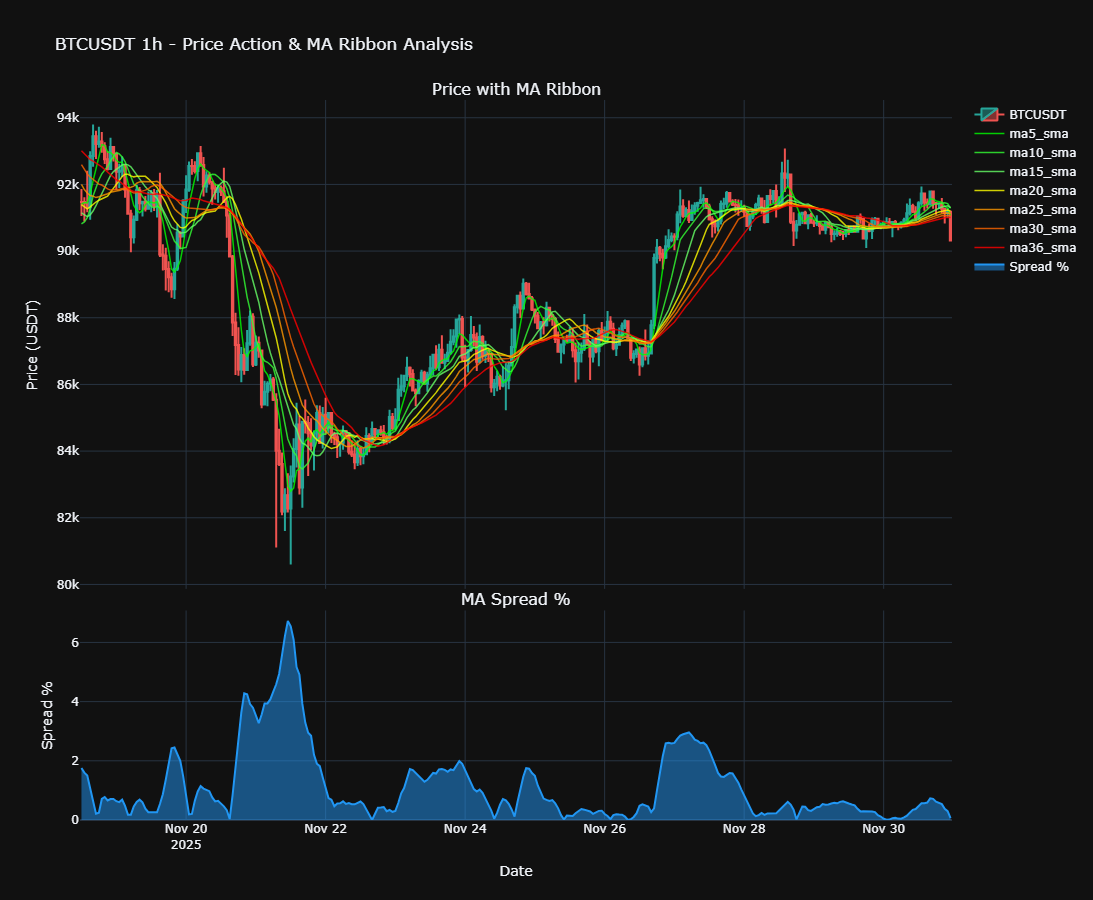

In [8]:
# Alternative visualization: MA Ribbon with dynamic coloring
# This version shows MAs colored differently for each candle based on position relative to close

df_viz = df.tail(300).copy()

fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    row_heights=[0.7, 0.3],
    subplot_titles=('Price with MA Ribbon', 'MA Spread %')
)

# Add candlestick
fig.add_trace(go.Candlestick(
    x=df_viz['open_time'],
    open=df_viz['open'],
    high=df_viz['high'],
    low=df_viz['low'],
    close=df_viz['close'],
    name='BTCUSDT',
    increasing_line_color='#26a69a',
    decreasing_line_color='#ef5350'
), row=1, col=1)

# Add selected MAs to show the ribbon clearly
selected_mas = ['ma5_sma', 'ma10_sma', 'ma15_sma', 'ma20_sma', 'ma25_sma', 'ma30_sma', 'ma36_sma']
colors = ['#00ff00', '#33ff33', '#66ff66', '#ffff00', '#ff9900', '#ff6600', '#ff0000']

for ma_col, color in zip(selected_mas, colors):
    if ma_col in df_viz.columns:
        fig.add_trace(go.Scatter(
            x=df_viz['open_time'],
            y=df_viz[ma_col],
            mode='lines',
            name=ma_col,
            line=dict(width=1.5, color=color),
            opacity=0.8
        ), row=1, col=1)

# Add spread_pct to bottom panel
if 'spread_pct' in df_viz.columns:
    fig.add_trace(go.Scatter(
        x=df_viz['open_time'],
        y=df_viz['spread_pct'],
        mode='lines',
        name='Spread %',
        line=dict(width=2, color='#2196f3'),
        fill='tozeroy'
    ), row=2, col=1)

fig.update_layout(
    title=f'BTCUSDT {TIMEFRAME} - Price Action & MA Ribbon Analysis',
    template='plotly_dark',
    height=900,
    showlegend=True,
    hovermode='x unified',
    xaxis2_title='Date',
)

fig.update_yaxes(title_text="Price (USDT)", row=1, col=1)
fig.update_yaxes(title_text="Spread %", row=2, col=1)
fig.update_xaxes(rangeslider_visible=False)

fig.show()

## 5. Feature Distributions

Analyze the distribution of key MAR indicator features.

In [9]:
# Key features to analyze
key_features = ['spread_pct', 'ma_range_pct', 'compression', 'price_position']
key_features_available = [col for col in key_features if col in df.columns]

# Create subplots for histograms
n_features = len(key_features_available)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig = make_subplots(
    rows=n_rows, cols=n_cols,
    subplot_titles=key_features_available
)

for idx, feature in enumerate(key_features_available):
    row = idx // n_cols + 1
    col = idx % n_cols + 1
    
    # Remove NaN values for histogram
    data = df[feature].dropna()
    
    fig.add_trace(
        go.Histogram(
            x=data,
            nbinsx=50,
            name=feature,
            marker_color='#2196f3',
            opacity=0.7
        ),
        row=row, col=col
    )
    
    # Update axis labels
    fig.update_xaxes(title_text=feature, row=row, col=col)
    fig.update_yaxes(title_text="Frequency", row=row, col=col)

fig.update_layout(
    title='Distribution of Key MAR Features',
    template='plotly_dark',
    height=300 * n_rows,
    showlegend=False
)

fig.show()

# Print statistics
print("\nFeature Statistics:")
print(df[key_features_available].describe())


Feature Statistics:
        spread_pct  ma_range_pct  compression  price_position
count 51829.000000  51860.000000 51864.000000    51864.000000
mean      1.288294      1.503627     0.211669        0.523600
std       1.514346      1.515223     0.408495        0.419988
min       0.000038      0.000000     0.000000        0.000000
25%       0.325171      0.565343     0.000000        0.031250
50%       0.830978      1.072536     0.000000        0.562500
75%       1.733372      1.946403     0.000000        1.000000
max      44.699430     44.699430     1.000000        1.000000


In [10]:
# Box plots for outlier detection
fig = go.Figure()

for feature in key_features_available:
    data = df[feature].dropna()
    fig.add_trace(go.Box(
        y=data,
        name=feature,
        boxmean='sd'
    ))

fig.update_layout(
    title='Box Plots - Feature Distributions and Outliers',
    yaxis_title='Value',
    template='plotly_dark',
    height=600
)

fig.show()

## 6. Correlation Analysis

Examine correlations between features to understand relationships.

In [11]:
# Select numeric features for correlation analysis
# Exclude time and MA values themselves, focus on derived features
exclude_patterns = ['open_time', 'ma\d+_sma', 'ma\d+_ema', 'ma\d+_wma']
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Filter out MA columns and keep price + derived features
import re
feature_cols = [col for col in numeric_cols 
                if not any(re.match(pattern, col) for pattern in exclude_patterns)]

# Limit to key features if too many
if len(feature_cols) > 20:
    # Focus on key features
    feature_cols = ['open', 'high', 'low', 'close', 'volume',
                    'spread_sma', 'spread_ema', 'spread_wma', 'spread_pct',
                    'ma_std_sma', 'ma_range_sma', 'ma_range_pct',
                    'compression', 'expansion', 'price_position',
                    'cross_above', 'cross_below']
    feature_cols = [col for col in feature_cols if col in df.columns]

# Calculate correlation matrix
corr_matrix = df[feature_cols].corr()

print(f"Analyzing correlations for {len(feature_cols)} features")
print(f"Features: {', '.join(feature_cols)}")

Analyzing correlations for 17 features
Features: open, high, low, close, volume, spread_sma, spread_ema, spread_wma, spread_pct, ma_std_sma, ma_range_sma, ma_range_pct, compression, expansion, price_position, cross_above, cross_below


In [12]:
# Create correlation heatmap using plotly
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=corr_matrix.values,
    texttemplate='%{text:.2f}',
    textfont={"size": 8},
    colorbar=dict(title="Correlation")
))

fig.update_layout(
    title='Feature Correlation Heatmap',
    template='plotly_dark',
    height=800,
    width=900,
    xaxis={'side': 'bottom'},
)

fig.update_xaxes(tickangle=45)
fig.show()

In [13]:
# Find strongest correlations
print("\nStrongest Positive Correlations (excluding self-correlation):")
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append((
            corr_matrix.columns[i],
            corr_matrix.columns[j],
            corr_matrix.iloc[i, j]
        ))

corr_pairs_df = pd.DataFrame(corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
corr_pairs_df = corr_pairs_df.sort_values('Correlation', ascending=False)

print(corr_pairs_df.head(10))

print("\nStrongest Negative Correlations:")
print(corr_pairs_df.tail(10))


Strongest Positive Correlations (excluding self-correlation):
      Feature 1     Feature 2  Correlation
17         high         close     0.999971
0          open          high     0.999968
31          low         close     0.999966
1          open           low     0.999957
2          open         close     0.999950
16         high           low     0.999931
108  ma_std_sma  ma_range_sma     0.988195
102  spread_pct  ma_range_pct     0.976666
70   spread_sma    spread_ema     0.971797
71   spread_sma    spread_wma     0.951170

Strongest Negative Correlations:
          Feature 1    Feature 2  Correlation
65           volume  compression    -0.187180
18             high       volume    -0.207061
3              open       volume    -0.209942
45            close       volume    -0.210332
32              low       volume    -0.213766
134  price_position  cross_below    -0.356289
110      ma_std_sma  compression    -0.364648
116    ma_range_sma  compression    -0.369755
103      spread_

## 7. Pattern Examples

Identify and visualize examples of different market patterns using feature filters.

In [14]:
# Define pattern filters based on features
# These thresholds can be adjusted based on the data distribution

# Filter conditions
df_patterns = df.copy()

# Trending Up: price above MA ribbon, positive slope, expanding
if all(col in df_patterns.columns for col in ['price_position', 'expansion', 'spread_pct']):
    trending_up = df_patterns[
        (df_patterns['price_position'] > 0.7) &  # Price in upper portion of MA ribbon
        (df_patterns['expansion'] > df_patterns['expansion'].quantile(0.6)) &  # MAs expanding
        (df_patterns['spread_pct'] > df_patterns['spread_pct'].quantile(0.5))  # Decent spread
    ]
    print(f"Trending Up patterns found: {len(trending_up)}")
else:
    trending_up = pd.DataFrame()
    print("Cannot identify trending up patterns - missing features")

# Trending Down: price below MA ribbon, negative slope
if all(col in df_patterns.columns for col in ['price_position', 'expansion', 'spread_pct']):
    trending_down = df_patterns[
        (df_patterns['price_position'] < 0.3) &  # Price in lower portion of MA ribbon
        (df_patterns['expansion'] > df_patterns['expansion'].quantile(0.6)) &  # MAs expanding
        (df_patterns['spread_pct'] > df_patterns['spread_pct'].quantile(0.5))  # Decent spread
    ]
    print(f"Trending Down patterns found: {len(trending_down)}")
else:
    trending_down = pd.DataFrame()
    print("Cannot identify trending down patterns - missing features")

# Ranging: low spread, high compression, price near middle
if all(col in df_patterns.columns for col in ['compression', 'spread_pct', 'price_position']):
    ranging = df_patterns[
        (df_patterns['compression'] > df_patterns['compression'].quantile(0.7)) &  # High compression
        (df_patterns['spread_pct'] < df_patterns['spread_pct'].quantile(0.3)) &  # Low spread
        (df_patterns['price_position'] > 0.3) &
        (df_patterns['price_position'] < 0.7)  # Price in middle of ribbon
    ]
    print(f"Ranging patterns found: {len(ranging)}")
else:
    ranging = pd.DataFrame()
    print("Cannot identify ranging patterns - missing features")

Trending Up patterns found: 5593
Trending Down patterns found: 4937
Ranging patterns found: 1451


In [15]:
# REGIME COLOR-CODED CHART
# Green = Trending Up, Yellow = Ranging, Red = Trending Down

def classify_regime(row):
    """Classify market regime based on features"""
    # Use bullish_pct and price_position to determine regime
    bullish_pct = row.get('bullish_pct_sma', 0.5)
    price_pos = row.get('price_position', 0.5)
    spread = row.get('spread_pct', 1)
    compression = row.get('compression', 0)
    
    # Trending Up: Most MAs rising + price above ribbon
    if bullish_pct > 0.6 and price_pos > 0.6:
        return 'trending_up'
    # Trending Down: Most MAs falling + price below ribbon
    elif bullish_pct < 0.4 and price_pos < 0.4:
        return 'trending_down'
    # Ranging: Mixed signals or compressed MAs
    else:
        return 'ranging'

# Apply classification
df_viz = df.tail(500).copy()
df_viz['regime'] = df_viz.apply(classify_regime, axis=1)

# Create figure
fig = go.Figure()

# Add background colors for each regime
regime_colors = {
    'trending_up': 'rgba(0, 255, 0, 0.15)',      # Green
    'ranging': 'rgba(255, 255, 0, 0.15)',         # Yellow
    'trending_down': 'rgba(255, 0, 0, 0.15)'      # Red
}

# Find contiguous regime blocks
current_regime = None
block_start = None

for idx, row in df_viz.iterrows():
    if row['regime'] != current_regime:
        # Close previous block
        if current_regime is not None and block_start is not None:
            fig.add_vrect(
                x0=block_start, x1=prev_time,
                fillcolor=regime_colors[current_regime],
                layer="below", line_width=0
            )
        # Start new block
        current_regime = row['regime']
        block_start = row['open_time']
    prev_time = row['open_time']

# Close final block
if current_regime is not None:
    fig.add_vrect(
        x0=block_start, x1=prev_time,
        fillcolor=regime_colors[current_regime],
        layer="below", line_width=0
    )

# Add candlestick
fig.add_trace(go.Candlestick(
    x=df_viz['open_time'],
    open=df_viz['open'],
    high=df_viz['high'],
    low=df_viz['low'],
    close=df_viz['close'],
    name='BTCUSDT',
    increasing_line_color='#26a69a',
    decreasing_line_color='#ef5350'
))

# Add MA ribbon with slope coloring
ma_columns = [f'ma{i}_sma' for i in range(5, 37)]
ma_columns_available = [col for col in ma_columns if col in df_viz.columns]

for ma_col in ma_columns_available:
    ma_values = df_viz[ma_col].values
    times = df_viz['open_time'].values
    slopes = np.diff(ma_values, prepend=ma_values[0])
    
    i = 0
    while i < len(ma_values) - 1:
        current_rising = slopes[i] >= 0
        j = i + 1
        while j < len(slopes) and (slopes[j] >= 0) == current_rising:
            j += 1
        
        segment_times = times[i:j+1] if j < len(times) else times[i:]
        segment_values = ma_values[i:j+1] if j < len(ma_values) else ma_values[i:]
        color = 'rgba(38, 166, 154, 0.7)' if current_rising else 'rgba(239, 83, 80, 0.7)'
        
        fig.add_trace(go.Scatter(
            x=segment_times, y=segment_values,
            mode='lines', line=dict(width=1, color=color),
            showlegend=False, hoverinfo='skip'
        ))
        i = j

# Add legend for regimes
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', name='Trending Up',
                         marker=dict(size=15, color='rgba(0, 255, 0, 0.5)', symbol='square')))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', name='Ranging',
                         marker=dict(size=15, color='rgba(255, 255, 0, 0.5)', symbol='square')))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', name='Trending Down',
                         marker=dict(size=15, color='rgba(255, 0, 0, 0.5)', symbol='square')))

fig.update_layout(
    title=f'BTCUSDT {TIMEFRAME} - Market Regime Detection (Green=Up, Yellow=Range, Red=Down)',
    template='plotly_dark',
    height=800,
    xaxis_rangeslider_visible=False,
    hovermode='x unified'
)

fig.show()

# Print regime statistics
print("\nRegime Distribution:")
print(df_viz['regime'].value_counts())
print(f"\nBullish % range: {df_viz['bullish_pct_sma'].min():.2f} - {df_viz['bullish_pct_sma'].max():.2f}")


Regime Distribution:
regime
trending_down    195
ranging          163
trending_up      142
Name: count, dtype: int64

Bullish % range: 0.00 - 1.00


In [16]:
def plot_pattern_example(pattern_df, pattern_name, n_candles=150):
    """
    Plot a random example of a specific pattern with candlestick chart and MA ribbon.
    
    Parameters:
    -----------
    pattern_df : pd.DataFrame
        DataFrame containing examples of the pattern
    pattern_name : str
        Name of the pattern for the chart title
    n_candles : int, default=150
        Number of candles to display for context
    """
    if len(pattern_df) == 0:
        print(f"No examples found for pattern: {pattern_name}")
        return
    
    # Select a random example from the pattern
    random_idx = np.random.randint(0, len(pattern_df))
    example = pattern_df.iloc[random_idx]
    
    # Get the index in the main dataframe
    example_time = example['open_time']
    main_idx = df[df['open_time'] == example_time].index[0]
    
    # Get surrounding context (n_candles/2 before and after)
    half_window = n_candles // 2
    start_idx = max(0, main_idx - half_window)
    end_idx = min(len(df), main_idx + half_window)
    
    # Extract the window of data
    df_window = df.iloc[start_idx:end_idx].copy()
    
    # Create figure
    fig = go.Figure()
    
    # Add candlestick
    fig.add_trace(go.Candlestick(
        x=df_window['open_time'],
        open=df_window['open'],
        high=df_window['high'],
        low=df_window['low'],
        close=df_window['close'],
        name='BTCUSDT',
        increasing_line_color='#26a69a',
        decreasing_line_color='#ef5350'
    ))
    
    # Add MA ribbon with slope-based coloring
    ma_columns = [f'ma{i}_sma' for i in range(5, 37)]
    ma_columns_available = [col for col in ma_columns if col in df_window.columns]
    
    for ma_col in ma_columns_available:
        ma_values = df_window[ma_col].values
        times = df_window['open_time'].values
        
        # Calculate slope (current - previous)
        slopes = np.diff(ma_values, prepend=ma_values[0])
        
        # Split into segments where color changes
        i = 0
        while i < len(ma_values) - 1:
            # Find where slope changes sign
            current_rising = slopes[i] >= 0
            j = i + 1
            while j < len(slopes) and (slopes[j] >= 0) == current_rising:
                j += 1
            
            # Plot this segment
            segment_times = times[i:j+1] if j < len(times) else times[i:]
            segment_values = ma_values[i:j+1] if j < len(ma_values) else ma_values[i:]
            
            color = 'rgba(38, 166, 154, 0.6)' if current_rising else 'rgba(239, 83, 80, 0.6)'
            
            fig.add_trace(go.Scatter(
                x=segment_times,
                y=segment_values,
                mode='lines',
                line=dict(width=1, color=color),
                showlegend=False,
                hoverinfo='skip'
            ))
            
            i = j
    
    # Add vertical line to mark the example candle
    fig.add_vline(
        x=example_time,
        line_width=2,
        line_dash="dash",
        line_color="yellow",
        annotation_text="Pattern Example",
        annotation_position="top"
    )
    
    # Add legend entries
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', name='MA Rising',
                             line=dict(color='#26a69a', width=2)))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', name='MA Falling',
                             line=dict(color='#ef5350', width=2)))
    
    # Update layout
    title_text = f'{pattern_name} Pattern Example<br>'
    title_text += f'Date: {example_time.strftime("%Y-%m-%d %H:%M")}, '
    if 'price_position' in example:
        title_text += f'Price Position: {example["price_position"]:.2f}, '
    if 'spread_pct' in example:
        title_text += f'Spread: {example["spread_pct"]:.2f}%'
    
    fig.update_layout(
        title=title_text,
        xaxis_title='Date',
        yaxis_title='Price (USDT)',
        template='plotly_dark',
        height=800,
        xaxis_rangeslider_visible=False,
        hovermode='x unified',
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        )
    )
    
    fig.show()
    
    print(f"\nPattern: {pattern_name}")
    print(f"Date: {example_time}")
    print(f"Price: ${example['close']:.2f}")
    if 'price_position' in example:
        print(f"Price Position: {example['price_position']:.2f}")
    if 'spread_pct' in example:
        print(f"MA Spread: {example['spread_pct']:.2f}%")
    if 'compression' in example:
        print(f"Compression: {example['compression']:.2f}")
    if 'expansion' in example:
        print(f"Expansion: {example['expansion']:.2f}")
    if 'bullish_pct_sma' in example:
        print(f"Bullish %: {example['bullish_pct_sma']:.2f}")
    
    print(f"\nDisplaying {len(df_window)} candles of context")

In [17]:
# Plot Trending Up example
plot_pattern_example(trending_up, "Trending Up", n_candles=150)

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:
# Plot Trending Down example
plot_pattern_example(trending_down, "Trending Down", n_candles=150)

In [ ]:
# Plot Ranging example
plot_pattern_example(ranging, "Ranging", n_candles=150)

## Summary

This notebook explored the BTCUSDT data with MAR (Moving Average Ribbon) indicators:

1. **Data loaded successfully** from parquet files with comprehensive feature set
2. **MA Ribbon visualization** shows the relationship between 32 SMAs and price action
3. **Feature distributions** reveal the statistical properties of key indicators
4. **Correlation analysis** identifies relationships between features
5. **Pattern examples** demonstrate how to filter for specific market conditions

Key insights:
- The MA ribbon provides clear visual signals for trend direction and strength
- Compression/expansion metrics help identify ranging vs trending markets
- Price position within the ribbon indicates support/resistance levels
- Spread percentage shows the overall trend strength and momentum

Next steps:
- Use these patterns to create labels for machine learning
- Develop trading strategies based on MAR indicators
- Backtest pattern-based entry/exit signals